# Name : Ayushi Singh
## Roll No : 200258
## Customer Churn Rate in Telecom Industry

Importing libraries

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import probplot 
import sklearn 
!pip install ppscore
import ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv("https://hello.iitk.ac.in/sites/default/files/ime672asem3/assignments/problems/a83a246242e4a760c6c4078e93ad481a0fcc66c973fe6a1bec4ff68f85fb9445_Telco-Customer-Churn.csv")    # Reading the given CSV file

Data Analysis

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Description of a few features: <br>
* gender - Whether the customer is a male or a female
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner - Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not, that is capable of holding some calls (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

Most of the data is categorical (might be ordinal or nominal).<br>
Number of features = 21 (20, if we ignore Customer ID) <br>
There are no missing or null values

In [8]:
sns.set(palette=sns.color_palette("Blues_r"),style="whitegrid", context = "paper")
sns.despine(top=True, left=True, bottom=False, right=False)

<Figure size 432x288 with 0 Axes>

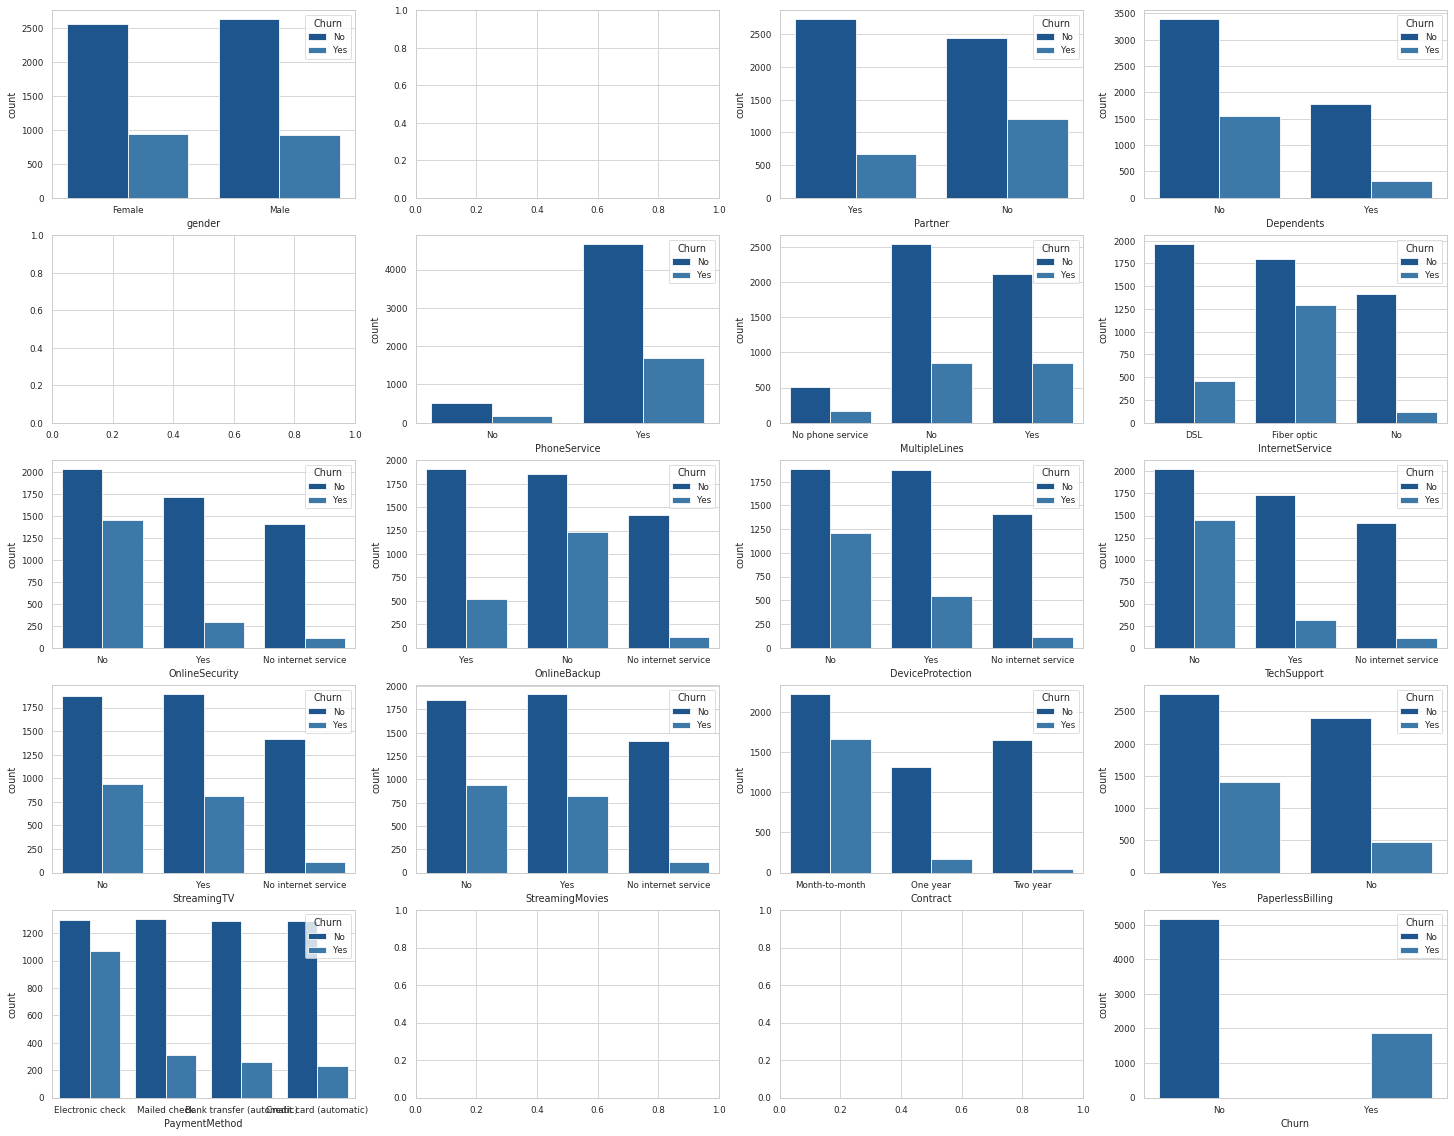

In [9]:
# PLotting barplot for categorical variables only, except customer ID
fig,axes = plt.subplots(5,4, figsize=(25, 20))
for i,ax in zip(df.columns[1:],axes.flatten()): 
    if(is_string_dtype(df[i])):
        sns.countplot(x=df[i],ax=ax,hue=df["Churn"])

Observation from the above plot:<br>
* In the given data, around 71% people **didn't churn** <br>
* Churn distribution is almost similar for both genders
* Electronic payment method has more churn rate as compared to other payment methods
* Month-to-Month contract has higher churn rate than other contracts. It is logical too, cause once you have bought the service for an year or two, people generally do not prefer changing the service due to the hassle it might cause.
* Customer with no Internet service (wherever this value is present) have a very low churn rate. (Maybe because they are not used to the modern technology, and do not prefer changing services)
* People with device protection and Tech-Support (Yes) have less churn rate than people with no device protection or Tech-Support (No), indicating that people are satisfied with the services provided
* Around 650 people didn't take phone service, number is relatively small compared to the total size of the dataset and won't be analyzed.
* People with dependencies or partners have comparatively less churn rate (Around 12.5% for dependencies and 69.5% for partners), than people with no partnes or dependencies.
* Customers with no internet services are generally from rural area or want to use their service for just calling or other purpose, thus leaving a very small margin for dissatisfaction and changing the service.
* Another interesting pattern in internet-services is customer with DSL have relatievely very less churn rate as compared to Fiber-optics, indicating dissatisfaction with the latter.

* A general patter can be observed: Customers who didn't take services like Online-Security, Online-Backup, Device-Support, Tech-Support, have higher churn rate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


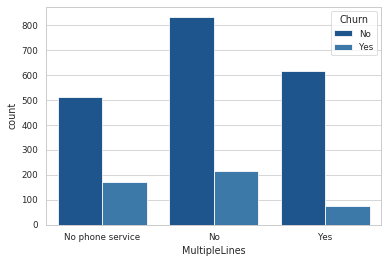

In [10]:
# sns.countplot(df[df["InternetService"]=="Fiber optic"]["OnlineSecurity"])
# sns.countplot(df[df["InternetService"]=="No"]["OnlineSecurity"])
# sns.countplot(df[df["InternetService"]=="No"]["OnlineBackup"])
sns.countplot(df[df["InternetService"]=="DSL"]["MultipleLines"],hue = df["Churn"])
plt.show()
# sns.countplot(df[df["InternetService"]=="Fiber optic"]["OnlineSecurity"])

# Customers with no internet service, do not have onlineSecurity, Online BAckup, Streaming TV, Tech-Support, Device-Protection, Streaming, Movies

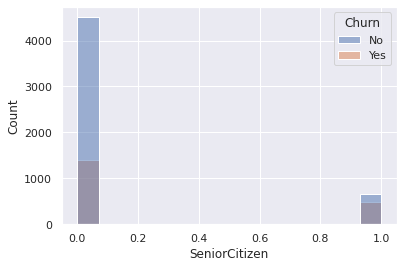

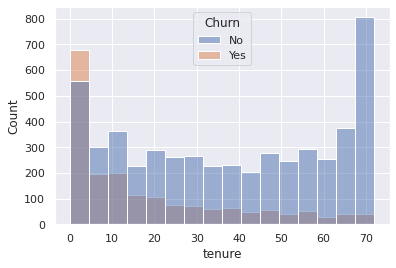

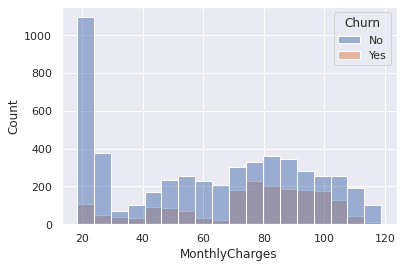

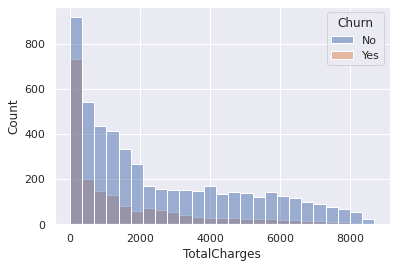

In [11]:
sns.set()
for i in (df.columns): 
    if(is_numeric_dtype(df[i])):
        sns.histplot(x=df[i],hue=df["Churn"])
        plt.show()

Observations from the above plots:
* People with less value of tenure are more likely to churn.
* Customer's whose monthly bill is less (<= 70) or among the greatest (>=110) are less likely to churn, than customers in the middle range.
* Senior citizens are more likely to churn

Creating a copy of Dataframe, and replacing categorical values with numerical, for ease in further analysis.

In [12]:
df1 = df
df1.drop(["customerID"],axis=1, inplace=True)
df1.replace(to_replace = ["Yes", "Two year","Female", "DSL"],value=2, inplace=True)
df1.replace(to_replace = ["No","One year", "Male", "Fiber optic"],value=1, inplace=True)
df1.replace(to_replace = ["No internet service", "Month-to-month", "No phone service"],value=0, inplace=True)


In [13]:
df1.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
df1.replace(to_replace = "Electronic check",value=3, inplace=True)
df1.replace(to_replace = "Credit card (automatic)",value=2, inplace=True)
df1.replace(to_replace = "Bank transfer (automatic)",value=1, inplace=True)
df1.replace(to_replace = "Mailed check",value=0, inplace=True)


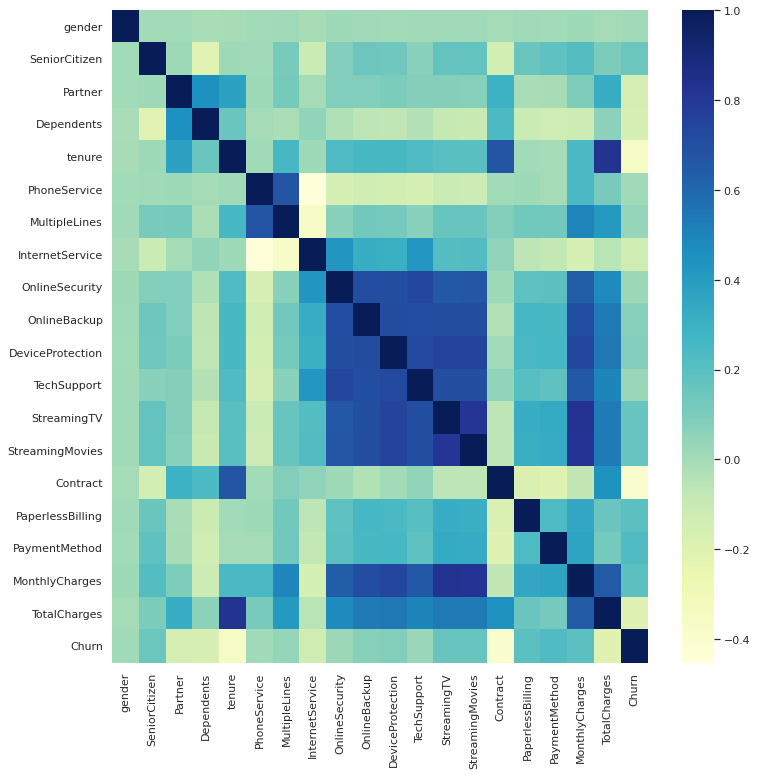

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(),cmap="YlGnBu")

Observations from the above heatmap: <br> 
* Contract,Total Charges and Tenure are highly correlated
* Monthly charges increases when customers bought other services (Tech-Support, Onine backup, Streaming, etc.)
* Most Senior citizens have no dependents
* All the offered services are correlated, we can just replace them with one attribute Services
* Tenure and Churn are negatively correlated as expected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


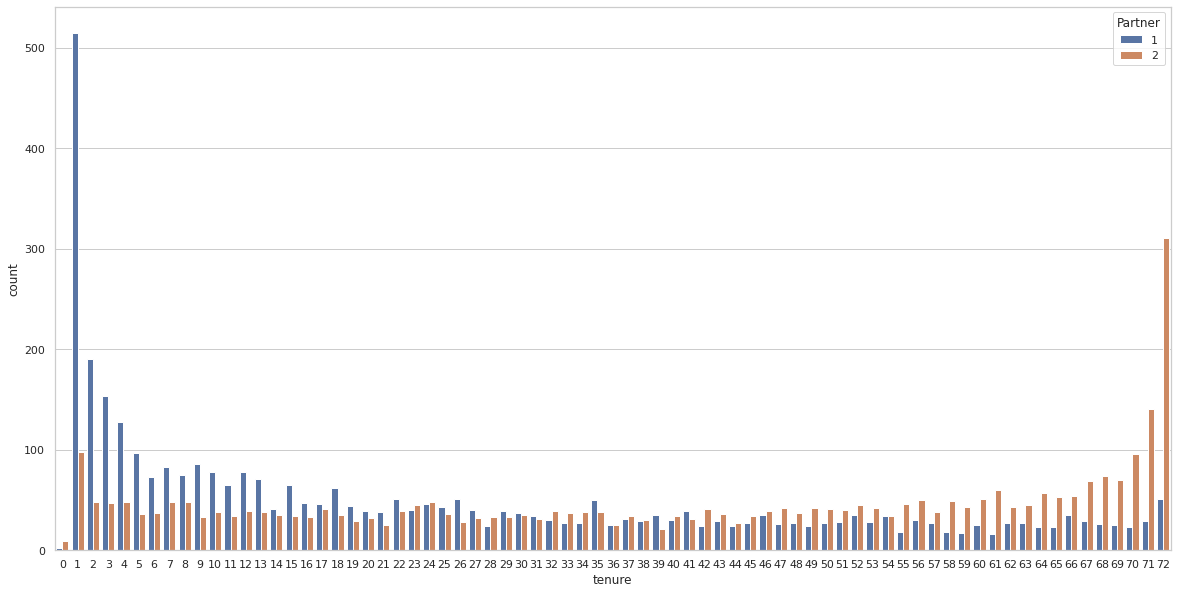

In [16]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.countplot(df['tenure'], hue = df["Partner"])

If customers have partner, then their tenure is more likely to be greater as compared to the ones without a partner

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


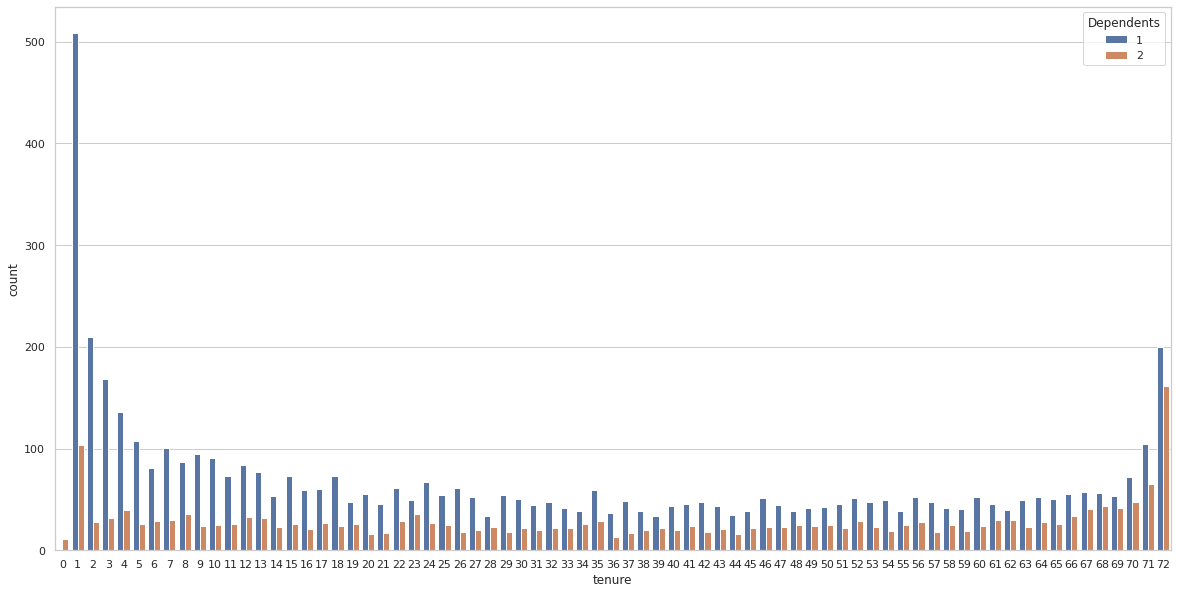

In [17]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.countplot(df['tenure'], hue = df["Dependents"])

Customers with no dependent are likely to have less tenure.

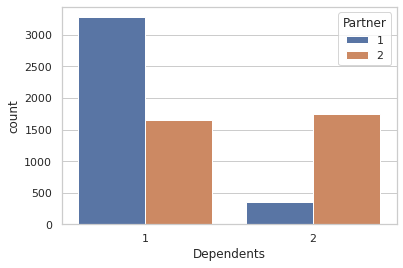

In [18]:
sns.countplot(x = "Dependents", data=df1, hue="Partner")

We can club Dependents and Partner into one attribute

Plotting Heatmap of Predictive Power Score

In [19]:
matrix_df = ppscore.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

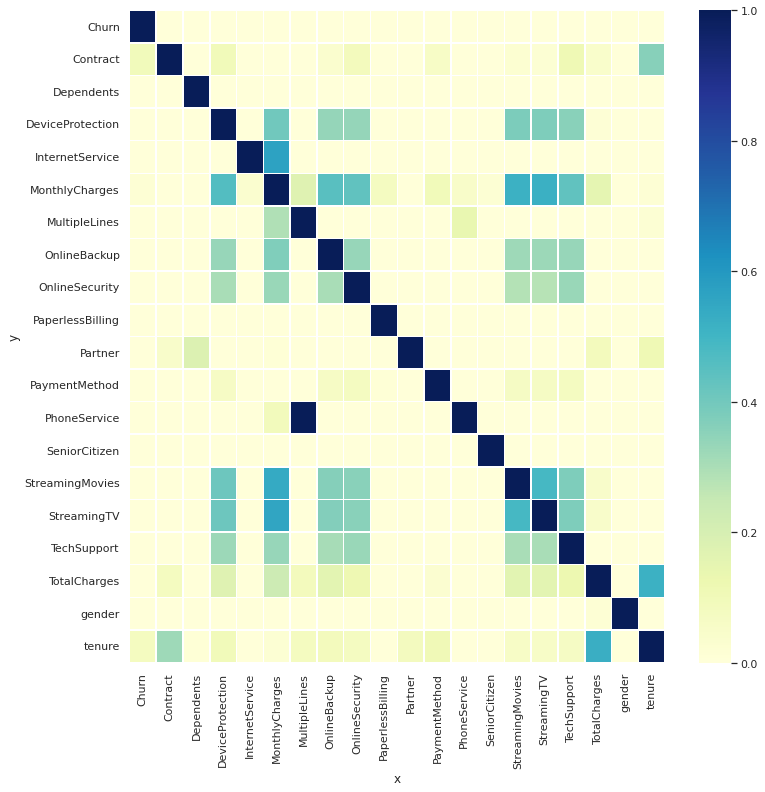

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="YlGnBu", linewidths=0.5)

* Services are good predictor of monthly charges,
* total charges and tenure are good predictors of each other
* Dependents can predict Partners , but the opposite is not True
* most relation observed are among services provided, charges (monthly and total) and tenure.

In [21]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.495244,0.162147,1.483033,1.299588,32.371149,1.903166,1.325004,1.343746,1.069999,1.128212,1.127219,1.073548,1.167684,1.171234,0.690473,1.592219,1.658810,64.761692,2279.732178,1.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.474991,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.833755,0.491457,1.163753,30.090047,2266.794434,0.441561
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,35.500000,398.549988,1.000000
50%,1.000000,0.000000,1.000000,1.000000,29.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,70.350000,1394.550049,1.000000
75%,2.000000,0.000000,2.000000,2.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,89.850000,3786.599976,2.000000
max,2.000000,1.000000,2.000000,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,118.750000,8684.799805,2.000000


In [22]:
data=df.copy()
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

An easy way to check for missing values is to use the method isnull. We will get a data frame with true (1) and false (0) values, so we will sum the values and we can see in which column we have missing values.

Importing an array of features and an array of dependent variable

In [23]:
# importing an array of features
x = df.iloc[:, :-1].values 
# importing an array of dependent variable
y = df.iloc[:, 3].values

In [24]:
print(x) # returns an array of features

[[2.00000000e+00 0.00000000e+00 2.00000000e+00 ... 3.00000000e+00
  2.98500000e+01 2.98500004e+01]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  5.69500000e+01 1.88950000e+03]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  5.38500000e+01 1.08150002e+02]
 ...
 [2.00000000e+00 0.00000000e+00 2.00000000e+00 ... 3.00000000e+00
  2.96000000e+01 3.46450012e+02]
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  7.44000000e+01 3.06600006e+02]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.05650000e+02 6.84450000e+03]]


In [25]:
print(y) # viewing an array of the dependent variable.

[1 1 1 ... 2 1 1]


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

The data we get is rarely homogenous. Sometimes data can be missing and it needs to be handled so that it does not reduce the performance of our machine learning model.To do this we need to replace the missing data by the Mean or Median of the entire column. For this we will be using the sklearn.preprocessing Library which contains a class called Imputer which will help us in taking care of our missing data.

In [27]:
imputer = imputer.fit(x[:, 1:3])

Our object name is imputer. Now we fit the imputer object to our data.

In [28]:
x[:, 1:3] = imputer.transform(x[:, 1:3])

Now replacing the missing values with the mean of the column by using transform method.

In [29]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,0,2,1,1,1,0,2,1,2,1,1,1,1,0,2,3,29.85,29.850000,1
1,1,0,1,1,34,2,1,2,2,1,2,1,1,1,1,1,0,56.95,1889.500000,1
2,1,0,1,1,2,2,1,2,2,2,1,1,1,1,0,2,0,53.85,108.150002,2
3,1,0,1,1,45,1,0,2,2,1,2,2,1,1,1,1,1,42.30,1840.750000,1
4,2,0,1,1,2,2,1,1,1,1,1,1,1,1,0,2,3,70.70,151.649994,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,2,2,24,2,2,2,2,1,2,2,2,2,1,2,0,84.80,1990.500000,1
7039,2,0,2,2,72,2,2,1,1,2,2,1,2,2,1,2,2,103.20,7362.899902,1
7040,2,0,2,2,11,1,0,2,2,1,1,1,1,1,0,2,3,29.60,346.450012,1
7041,1,1,2,1,4,2,2,1,1,1,1,1,1,1,0,2,0,74.40,306.600006,2


The minimum value for the MonthlyCharges is 18.25, the maximum is 118.75 and the mean value is approx 64.76. Also, we can see that 25% of the values are under 35.5 and 75% are under 89.85. So, in this case, we have outliers. Outliers are observations that lie on abnormal distance from other observations in the data and they will affect the regression dramatically. Because of this, the regression will try to place the line closer to these values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


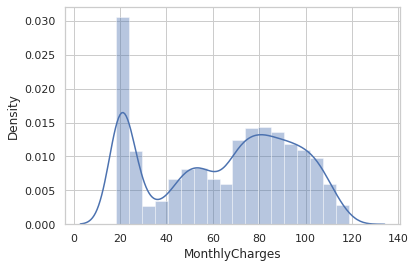

In [30]:
sns.distplot(df["MonthlyCharges"])


The common rule is to remove everything that is 3 * standard deviations far from the mean. For normally distributed values there is a known rule: 68–95–99.7.Based on this, we can say that the values that are out of the interval [mean — 3*std, mean + 3*std ] are outliers and these values can be removed.



In [31]:
q1=df['MonthlyCharges'].quantile(0.99865)
q2=df['MonthlyCharges'].quantile(0.00135)
data_t1=df[df['MonthlyCharges']<q1]
data_t2=data_t1[data_t1['MonthlyCharges']>q2]
data_t2.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000
mean,1.494872,0.162536,1.482906,1.299573,32.334758,1.902849,1.324644,1.344872,1.070655,1.129060,1.128063,1.074217,1.168661,1.172222,0.688319,1.592877,1.660541,64.770962,2274.959717,1.265812
std,0.500009,0.368968,0.499743,0.458103,24.545544,0.296184,0.643126,0.475360,0.704832,0.737248,0.736746,0.706989,0.755877,0.757428,0.833140,0.491333,1.163514,30.006414,2258.527832,0.441796
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.850000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,35.687500,399.400009,1.000000
50%,1.000000,0.000000,1.000000,1.000000,29.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,70.350000,1395.525024,1.000000
75%,2.000000,0.000000,2.000000,2.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,89.850000,3778.125061,2.000000
max,2.000000,1.000000,2.000000,2.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,117.350000,8594.400391,2.000000


The maximum value is still far away from the mean, but it is acceptably closer. We can now plot the distribution and we can see that the data is still distributed the same way, but with fewer outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


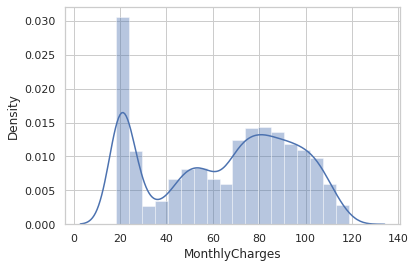

In [32]:
sns.distplot(df["MonthlyCharges"])

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.When VIF value is equal to 1, there is no multicollinearity at all. Values between 1 and 5 are considered perfectly okay.VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables=df[['tenure','PhoneService','MultipleLines','StreamingTV','StreamingMovies','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]
vif=pd.DataFrame()
dt=add_constant(variables)
vif["VIF"]=[variance_inflation_factor(dt.values,i) for i in range(len(dt.columns))]
vif["features"]=dt.columns
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,features
0,99.998303,const
1,6.019711,tenure
2,2.576001,PhoneService
3,2.621036,MultipleLines
4,4.662820,StreamingTV
5,4.651942,StreamingMovies
6,1.236070,PaymentMethod
7,11.668139,MonthlyCharges
8,9.963535,TotalCharges
9,1.319638,Churn


These results show that tenure, MonthlyCharges, TotalCharges and the interaction between them are statistically significant. However, the VIFs indicate that our model has severe multicollinearity for some of the independent variables.
Notice that Churn, PaymentMethod has a VIF near 1, which shows that multicollinearity does not affect it and we can trust this coefficient and p-value with no further action. However, the coefficients and p-values for the other terms are suspect!

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. 

There are two main advantages of dimensionality reduction with PCA.

*   The training time of the algorithms reduces significantly with less number of features.
*   It is not always possible to analyze data in high dimensions.

Divide the dataset into a feature set and corresponding labels.

In [34]:
X = df.drop('MonthlyCharges', 1)
Y = df['MonthlyCharges']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Divide data into training and test sets.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We create a PCA object named pca. We did not specify the number of components in the constructor. Hence, all the features in the feature set will be returned for both the training and test sets.The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.



In [37]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.29443223, 0.14681461, 0.11853635, 0.06085269, 0.05619643,
       0.05260921, 0.0431739 , 0.03972201, 0.03491053, 0.02712862,
       0.02515381, 0.01858145, 0.01635837, 0.01426388, 0.01335318,
       0.01267103, 0.01218517, 0.00998639, 0.00307016])

It can be seen that first principal component is responsible for 29.44% variance. Similarly, the second principal component causes 14.68% variance in the dataset and so on. Collectively we can say that (29.44 + 14.68) 44.12% of the classification information contained in the feature set is captured by the first two principal components.

In [38]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])

Now here comes the critical part, we will be projecting the twenty one - dimensional data to two-dimensional principal components.
Once we have the principal components, we can find the explained_variance_ratio. It will provide us with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [39]:
principal_breast_Df.tail()

,principal component 1,principal component 2
7038,-289.112813,22.787492
7039,5083.459256,-2.357335
7040,-1933.629743,-14.696370
7041,-1973.152152,28.661596
7042,4565.067049,4.438586


In [40]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [9.99860136e-01 1.22243587e-04]


From the above output, we can observe that the principal component 1 holds 99.98% of the information while the principal component 2 holds only 0.012% of the information. 